<a href="https://colab.research.google.com/github/FREDY129053/SkillBox_ML/blob/main/12_6_ML_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [11]:
### YOUR CODE HERE ###
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [12]:
### YOUR CODE HERE ###
df.isna().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [13]:
df.isna().sum() / df.shape[0]

CustomerID                0.000
Genre                     0.095
Age                       0.100
Annual Income (k$)        0.100
Spending Score (1-100)    0.000
dtype: float64

In [15]:
df_miss_row = df[df.isna().sum(axis=1) >= 2]
df_miss_row.shape

(5, 5)

In [16]:
df = df[df.isna().sum(axis=1) < 2]
df.shape

(195, 5)

Histogram for Spending Score (1-100)


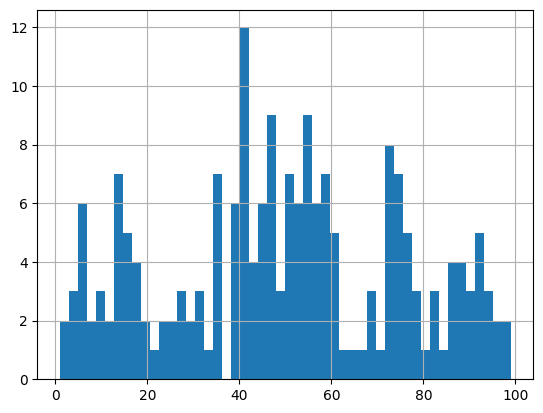

Histogram for Age


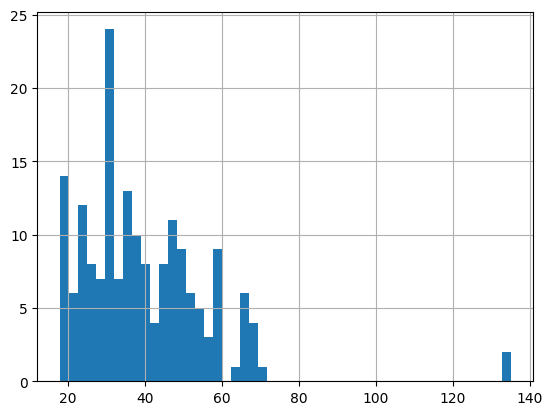

Histogram for Annual Income (k$)


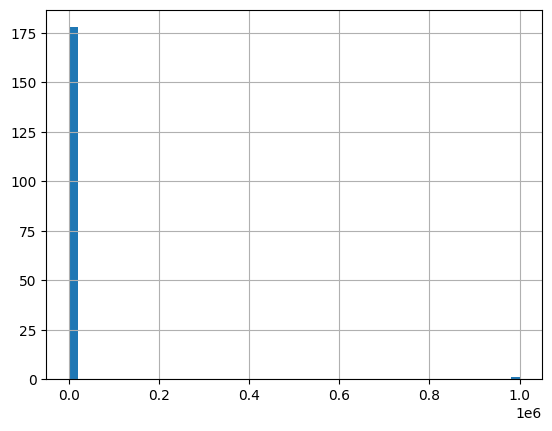

Histogram for CustomerID


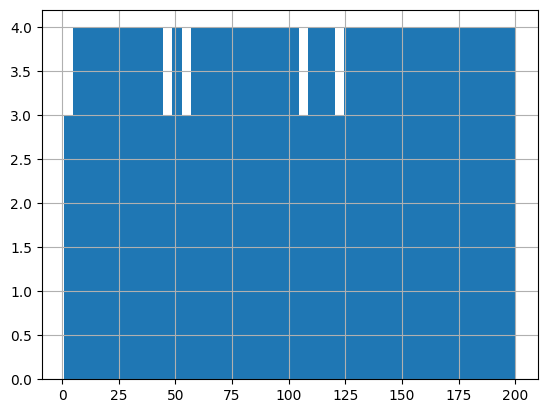

In [17]:
import matplotlib.pyplot as plt

num_cols = ['Spending Score (1-100)', 'Age', 'Annual Income (k$)', 'CustomerID']
for col in num_cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=50)
  plt.show()

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [18]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

xtrain, xtest = train_test_split(df, train_size=0.8, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [23]:
### YOUR CODE HERE ###
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Медиана для Annual Income (k$) | Самое часто встречаемое для Genre | KNN для age
imp_median = SimpleImputer(strategy='median')
most_freq = SimpleImputer(strategy='most_frequent')
imp_knn = KNNImputer()

med_cols = ['Annual Income (k$)']
most_freq_cols = ['Genre']
num_cols = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

xtrain[med_cols] = imp_median.fit_transform(xtrain[med_cols])
xtrain[most_freq_cols] = most_freq.fit_transform(xtrain[most_freq_cols])
xtrain[num_cols] = imp_knn.fit_transform(xtrain[num_cols])
xtrain.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
56,57,Female,51.0,44.0,50.0
15,16,Male,22.0,20.0,79.0
124,125,Female,23.0,70.0,29.0
20,21,Male,35.0,24.0,35.0
49,50,Female,31.0,40.0,42.0


In [24]:
xtrain.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
xtest[med_cols] = imp_median.fit_transform(xtest[med_cols])
xtest[most_freq_cols] = most_freq.fit_transform(xtest[most_freq_cols])
xtest[num_cols] = imp_knn.fit_transform(xtest[num_cols])

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


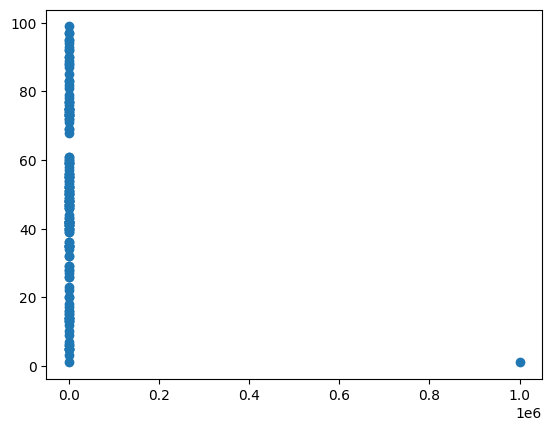

In [42]:
### YOUR CODE HERE ###
plt.scatter(xtrain['Annual Income (k$)'], xtrain['Spending Score (1-100)'])

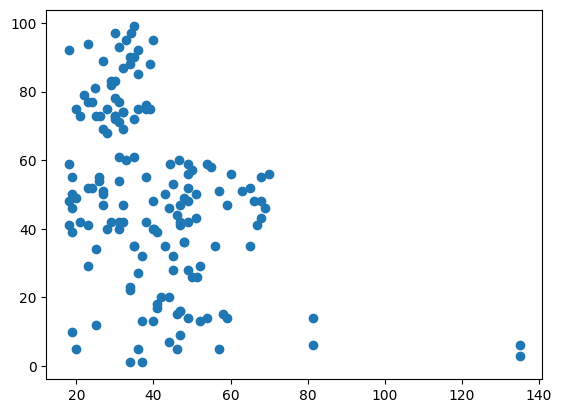

In [43]:
plt.scatter(xtrain['Age'], xtrain['Spending Score (1-100)'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


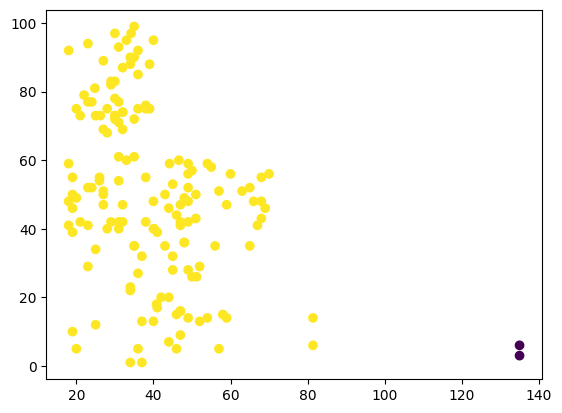

In [50]:
from sklearn.ensemble import IsolationForest

isf_1 = IsolationForest(n_estimators=100, contamination=0.01, random_state=1)
y_pred_1 = isf_1.fit_predict(xtrain[['Age', 'Spending Score (1-100)']])
plt.scatter(xtrain['Age'], xtrain['Spending Score (1-100)'], c=y_pred_1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


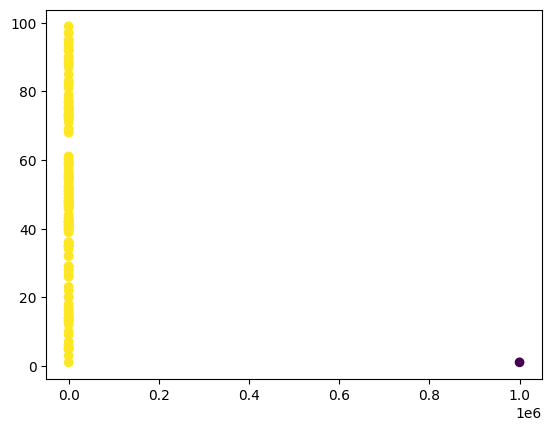

In [52]:
isf_2 = IsolationForest(n_estimators=100, contamination=0.005, random_state=1)
y_pred_2 = isf_2.fit_predict(xtrain[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.scatter(xtrain['Annual Income (k$)'], xtrain['Spending Score (1-100)'], c=y_pred_2)

In [53]:
xtrain['age_outline'] = y_pred_1
xtrain['annual_income_outline'] = y_pred_2
xtrain.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_outline,annual_income_outline
56,57,Female,51.0,44.0,50.0,1,1
15,16,Male,22.0,20.0,79.0,1,1
124,125,Female,23.0,70.0,29.0,1,1
20,21,Male,35.0,24.0,35.0,1,1
49,50,Female,31.0,40.0,42.0,1,1


In [55]:
xtrain = xtrain[xtrain['age_outline'] == 1]
xtrain = xtrain[xtrain['annual_income_outline'] == 1]
xtrain.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_outline,annual_income_outline
56,57,Female,51.0,44.0,50.0,1,1
15,16,Male,22.0,20.0,79.0,1,1
124,125,Female,23.0,70.0,29.0,1,1
20,21,Male,35.0,24.0,35.0,1,1
49,50,Female,31.0,40.0,42.0,1,1


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [58]:
### YOUR CODE HERE ###
xtrain[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,153.000000,153.000000,153.000000
mean,38.986928,61.633987,49.973856
std,13.877124,24.987826,24.822514
min,18.000000,15.000000,1.000000
25%,29.000000,46.000000,35.000000
50%,36.000000,62.000000,49.000000
75%,48.000000,78.000000,72.000000
max,81.400000,137.000000,99.000000


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_norm = scaler.fit_transform(xtrain[['Age', 'Annual Income (k$)']])
xtrain_norm

array([[ 8.68517423e-01, -7.08020701e-01],
       [-1.22811577e+00, -1.67164265e+00],
       [-1.15581807e+00,  3.35903075e-01],
       [-2.88245717e-01, -1.51103899e+00],
       [-5.77436502e-01, -8.68624359e-01],
       [ 1.88068517e+00, -9.48926188e-01],
       [-8.66627287e-01, -6.56060694e-02],
       [ 8.77023034e-02,  2.15450332e-01],
       [ 7.32427642e-02, -6.56060694e-02],
       [-5.05138806e-01, -5.47417043e-01],
       [-1.44500886e+00, -6.27718872e-01],
       [ 7.23922030e-01, -1.14968076e+00],
       [-1.43650325e-01,  1.41997777e+00],
       [-3.60543413e-01,  6.57110391e-01],
       [ 5.79326638e-01,  2.34344880e+00],
       [-6.49734198e-01,  3.02601434e+00],
       [-3.60543413e-01,  1.66088325e+00],
       [ 1.31080921e-01,  3.02601434e+00],
       [-2.15948021e-01,  1.01846862e+00],
       [ 4.34731245e-01, -3.06511556e-01],
       [-5.77436502e-01, -9.08775273e-01],
       [ 9.40815119e-01, -1.55118990e+00],
       [-5.77436502e-01,  3.35903075e-01],
       [ 7.

In [61]:
xtrain_norm_df = pd.DataFrame(xtrain_norm, columns=['Age', 'Annual Income (k$)'])
xtrain_norm_df.describe()

,Age,Annual Income (k$)
count,1.530000e+02,1.530000e+02
mean,1.161018e-17,-5.224579e-17
std,1.003284e+00,1.003284e+00
min,-1.517307e+00,-1.872397e+00
25%,-7.220319e-01,-6.277189e-01
50%,-2.159480e-01,1.469576e-02
75%,6.516243e-01,6.571104e-01
max,3.066367e+00,3.026014e+00


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [62]:
### YOUR CODE HERE ###
xtrain.describe(include=['object'])

,Genre
count,153
unique,3
top,Female
freq,95


In [64]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

ft = ohe.fit_transform(xtrain[['Genre']])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Genre_Female,Genre_Male
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [ ]:
### YOUR CODE HERE ###
# Заменить в коде xtrain на xtest, покрутить если что параметры при нахлждении выборосов. Готово)